# 6.2: Exploring Relationships

## Table of Content

[01. Import libraries](#01.-Import-libraries)

[02. Import Data](#02.-Import-Data)

[03. Exploratory Analysis](#03.-Exploratory-Analysis)

[03.1 Create a correlation matrix heatmap](#03.1-Create-a-correlation-matrix-heatmap)

[03.2 Create a scatterplot](#03.2-Create-a-scatterplot-for-the-variables-with-the-strongest-correlations)

[03.3 Create a histogram for the categorical variables](#03.3-Create-a-histogram-for-the-categorical-variables)

## 01. Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## 02. Import Data

In [3]:
# Read the data:
df = pd.read_pickle(r'E:\Careerfoundry course\My Project\Generated Data\Divvy_cleaned.pkl')

In [4]:
df.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year,from_latitude,from_longitude,from_location,to_latitude,to_longitude,to_location,year,month_start,month_end,day,hour_start,hour_end,age
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991,41.94,-87.65,POINT (-87.65304 41.94018),41.94,-87.66,POINT (-87.66402 41.943739),2015,12,12,Thursday,17,17,24
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992,41.91,-87.63,POINT (-87.631501 41.907993),41.90,-87.64,POINT (-87.640552 41.904613),2015,12,12,Thursday,17,17,23
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987,41.97,-87.65,POINT (-87.650154 41.9716),41.97,-87.65,POINT (-87.650001 41.967968),2015,12,12,Thursday,17,17,28
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975,41.91,-87.67,POINT (-87.667252 41.907066),41.88,-87.65,POINT (-87.648789 41.881892),2015,12,12,Thursday,17,17,40
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990,41.90,-87.64,POINT (-87.642884 41.897764),41.89,-87.64,POINT (-87.638437 41.894666),2015,12,12,Thursday,17,17,25


In [5]:
df.dtypes

trip_id                      object
start_time           datetime64[ns]
end_time             datetime64[ns]
bike_id                      object
trip_duration                 int64
from_station_id              object
from_station_name            object
to_station_id                object
to_station_name              object
user_type                    object
gender                       object
birth_year                    int32
from_latitude               float64
from_longitude              float64
from_location                object
to_latitude                 float64
to_longitude                float64
to_location                  object
year                          int32
month_start                   int32
month_end                     int32
day                          object
hour_start                    int32
hour_end                      int32
age                           int32
dtype: object

## 03. Exploratory Analysis

### 03.1 Create a correlation matrix heatmap 

In [6]:
# Create a subset of the data to include only numeric variables:
df_numbers = df[['trip_duration', 'birth_year', 'from_latitude', 'from_longitude', 'to_latitude', 'to_longitude', 'year', 'month_start', 'month_end', 'hour_start', 'hour_end', 'age']]

In [7]:
corr_matrix = df_numbers.corr()

In [8]:
corr_matrix

,trip_duration,birth_year,from_latitude,from_longitude,to_latitude,to_longitude,year,month_start,month_end,hour_start,hour_end,age
trip_duration,1.00,0.01,-0.00,0.01,-0.01,0.01,0.01,0.00,0.00,0.00,0.00,-0.00
birth_year,0.01,1.00,0.02,-0.02,0.02,-0.02,0.13,0.02,0.02,0.09,0.09,-0.98
from_latitude,-0.00,0.02,1.00,-0.56,0.84,-0.49,0.01,-0.00,-0.00,0.02,0.01,-0.02
from_longitude,0.01,-0.02,-0.56,1.00,-0.48,0.71,-0.03,-0.00,-0.00,0.04,0.05,0.01
to_latitude,-0.01,0.02,0.84,-0.48,1.00,-0.56,0.01,-0.00,-0.00,0.08,0.07,-0.02
to_longitude,0.01,-0.02,-0.49,0.71,-0.56,1.00,-0.03,-0.00,-0.00,-0.07,-0.06,0.01
year,0.01,0.13,0.01,-0.03,0.01,-0.03,1.00,-0.09,-0.09,-0.02,-0.01,0.06
month_start,0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.09,1.00,1.00,-0.01,-0.01,-0.04
month_end,0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.09,1.00,1.00,-0.01,-0.01,-0.04
hour_start,0.00,0.09,0.02,0.04,0.08,-0.07,-0.02,-0.01,-0.01,1.00,0.96,-0.09


In [9]:
df.describe()

,start_time,end_time,trip_duration,birth_year,from_latitude,from_longitude,to_latitude,to_longitude,year,month_start,month_end,hour_start,hour_end,age
count,21234782,21234782,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00,21234782.00
mean,2017-02-15 04:52:50.627234304,2017-02-15 05:11:38.636212480,1128.01,1982.04,41.90,-87.64,41.90,-87.64,2016.57,7.18,7.18,13.81,14.01,34.53
min,2013-06-27 01:06:00,2013-06-27 09:46:00,60.00,1930.00,41.74,-87.80,41.74,-87.80,2013.00,1.00,1.00,0.00,0.00,13.00
25%,2015-08-30 01:21:00,2015-08-30 01:48:00,411.00,1979.00,41.88,-87.65,41.88,-87.65,2015.00,6.00,6.00,10.00,10.00,29.00
50%,2017-04-22 17:01:00,2017-04-22 17:20:00,707.00,1984.00,41.89,-87.64,41.89,-87.64,2017.00,7.00,7.00,15.00,15.00,32.00
75%,2018-08-07 18:38:47.500000,2018-08-07 18:56:27,1210.00,1988.00,41.92,-87.63,41.92,-87.63,2018.00,9.00,9.00,17.00,18.00,37.00
max,2019-12-31 23:57:17,2020-01-10 01:06:36,11635000.00,2005.00,42.06,-87.55,42.06,-87.55,2019.00,12.00,12.00,23.00,23.00,85.00
std,NaN,NaN,15070.56,9.57,0.04,0.02,0.04,0.02,1.76,2.56,2.56,4.70,4.75,9.51


<Axes: >

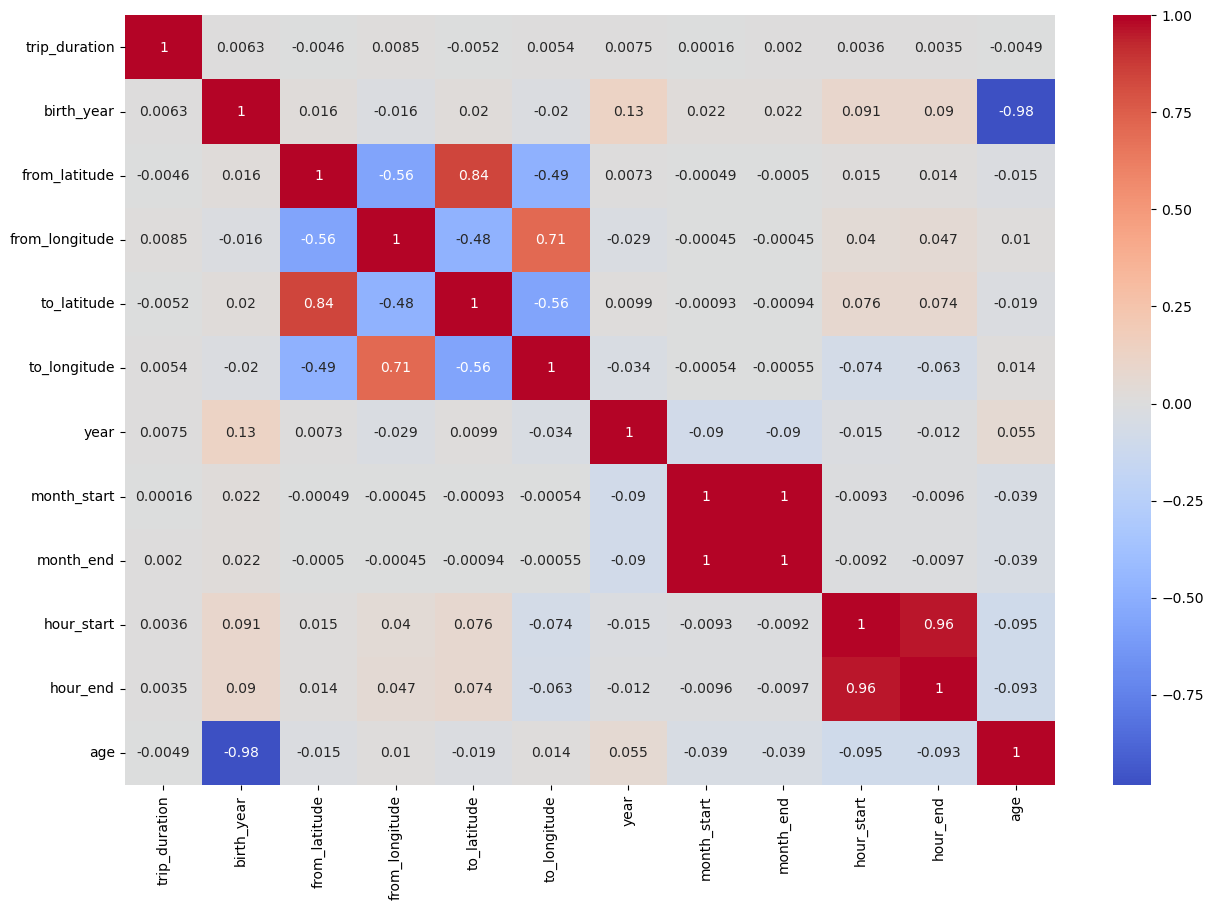

In [10]:
# Create a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

### Notes:
#### From the heatmap, it can be concluded that there are strong correlations only among the latitude and longitude variables, but not among the others.
#### My expectation was that there would be a strong correlation between age and trip duration. Therefore, I decided to create a scatter plot for age and trip duration.

### 03.2 Create a scatterplot for the variables with the strongest correlations 

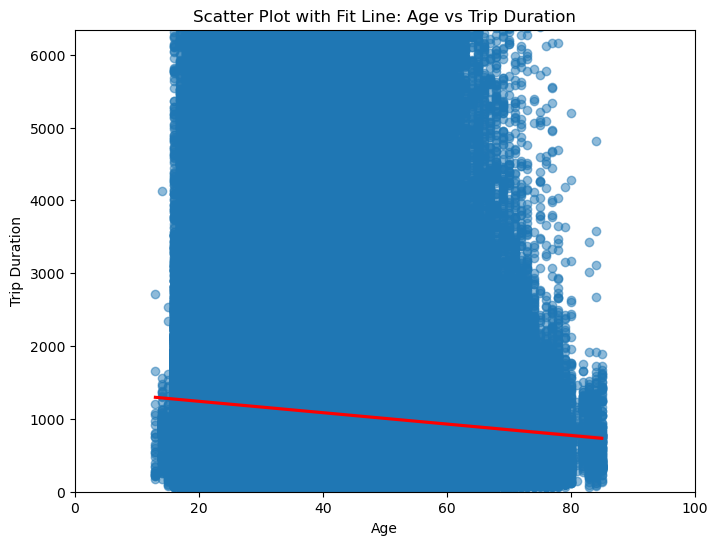

In [11]:
# Scatter plot with fit line using Seaborn's regplot
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='trip_duration', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Scatter Plot with Fit Line: Age vs Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration')
plt.xlim(0, 100)
plt.ylim(0, df['trip_duration'].quantile(0.99))  # Limit outliers
plt.show()

### Notes:
#### the scatter plot shows a very weak negative relationship between age and trip duration.
#### the regression line is almost flat with a slight downward slope, suggesting that age is not a strong predictor of trip duration.

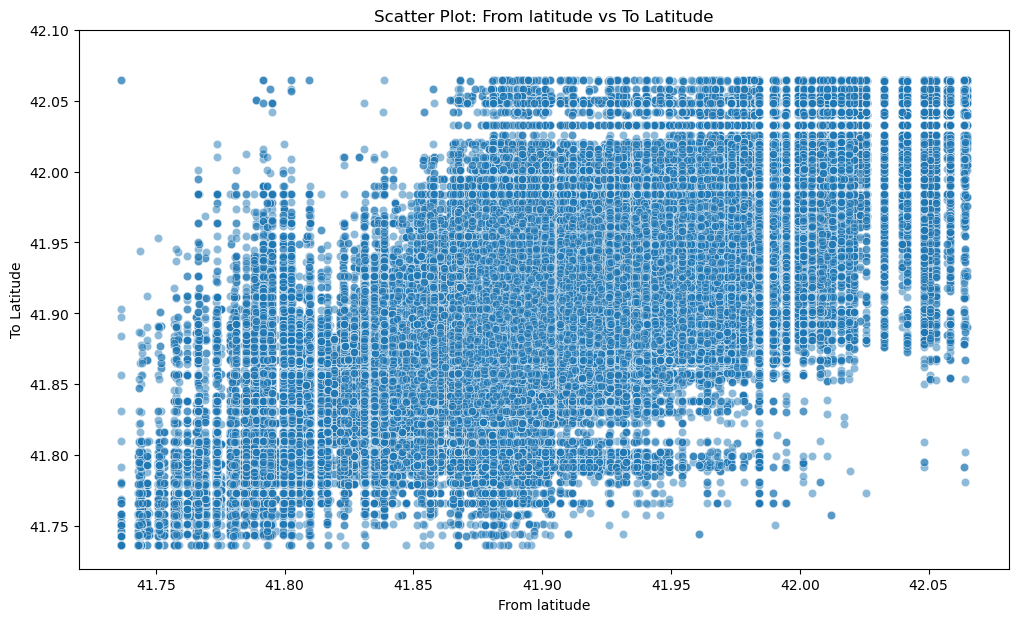

In [12]:
# Scatter plot for from latitude vs to latitude
plt.figure(figsize=(12, 7))
sns.scatterplot(x='from_latitude', y='to_latitude', data=df, alpha=0.5)
plt.title('Scatter Plot: From latitude vs To Latitude')
plt.xlabel('From latitude')
plt.ylabel('To Latitude')
plt.ylim(41.72, 42.1)
#plt.ylim(0, df['to_latitude'].quantile(0.99))
plt.show()

### Notes:
#### The dataset I chose contains more categorical variables than continuous variables. Therefore, I would limit the visualization to include only relevant variables
#### When evaluating the relationship between latitude and longitude variables, I found it difficult to interpret the results of the scatter plot. 
#### Additionally, it does not help in answering the key question of the project

### 03.3 Create a histogram for the categorical variables

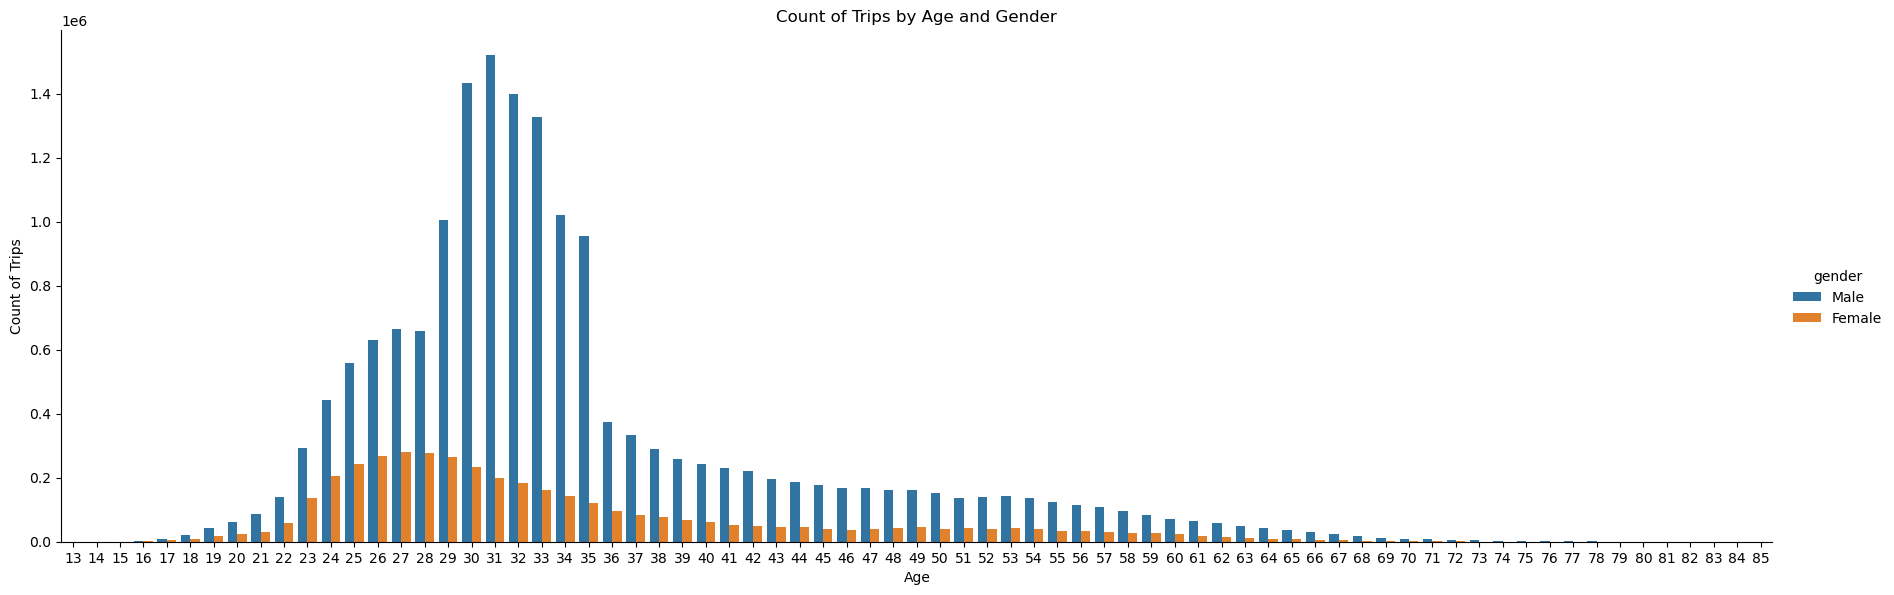

In [29]:
# A Plot shows the number of trips by age and Gender
sns.catplot(x='age', hue='gender', kind='count', data=df, height=6, aspect=3)
plt.title('Count of Trips by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count of Trips')
plt.show()

## Note:
### From the plot above, we can clearly see that males make the highest number of bike rentals compared to females. 
### The most common age group for male users ranges between 29 and 35.

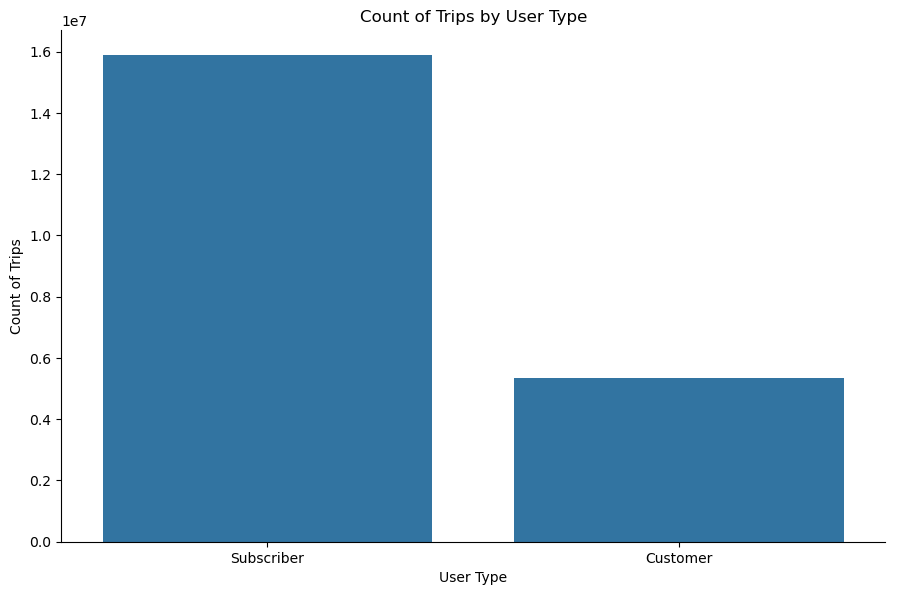

In [30]:
# A Plot shows the number of trips by user Type
sns.catplot(x='user_type', kind='count', data=df, height=6, aspect=1.5)
plt.title('Count of Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Count of Trips')
plt.show()

## Note: 
### From the plot, subscribers constitute the majority of users compared to customers.

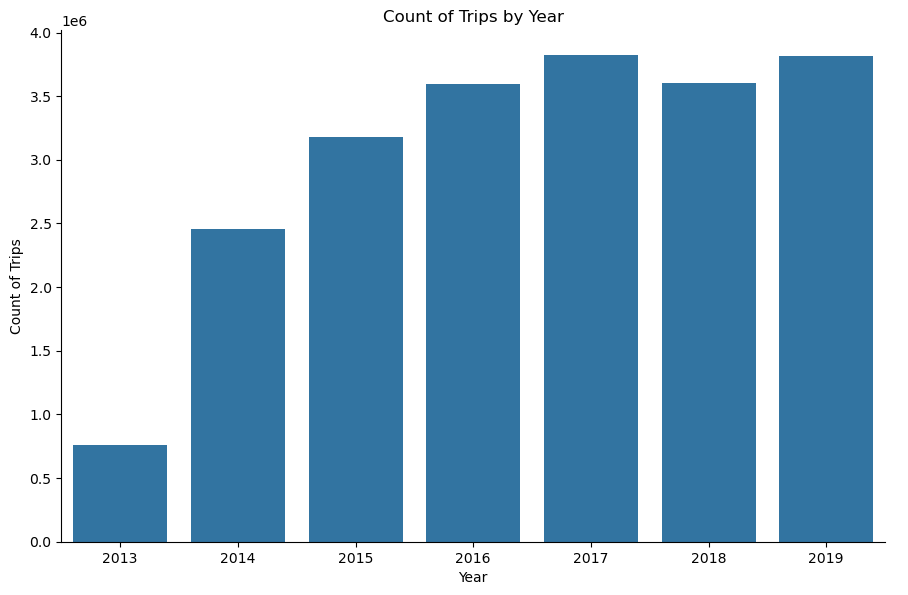

In [15]:
# A Plot shows the number of trips by year
sns.catplot(x='year', kind='count', data=df, height=6, aspect=1.5)
plt.title('Count of Trips by Year')
plt.xlabel('Year')
plt.ylabel('Count of Trips')
plt.show()

## Note: 
### From the plot above, bike rentals have increased over the years from 2014 onwards, reaching their peak in 2017 and 2019.
### The lowest bike usage was in 2013.

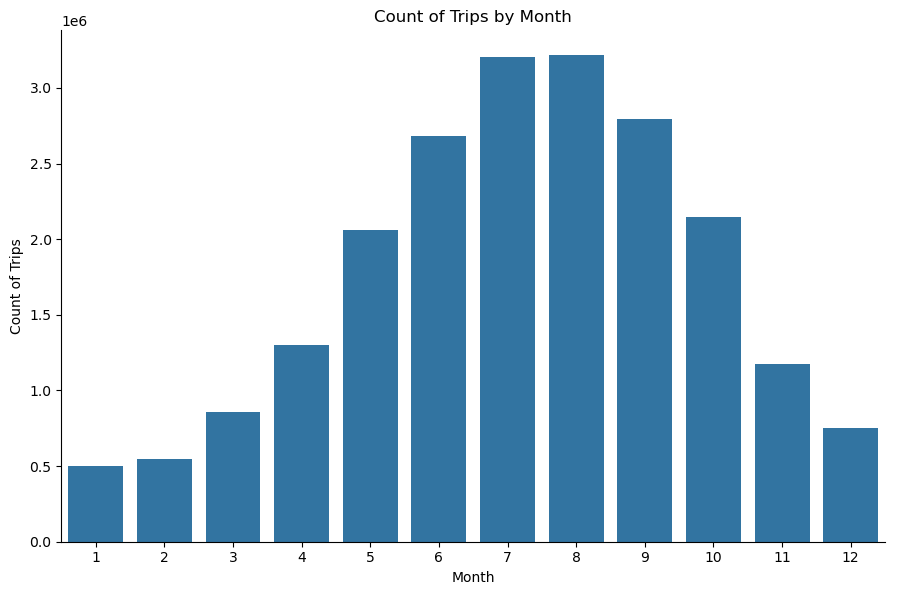

In [16]:
# A Plot shows the number of trips by month
sns.catplot(x='month_start', kind='count', data=df, height=6, aspect=1.5)
plt.title('Count of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Count of Trips')
plt.show()

### Note: 
### From the plot, we can clearly see that bike rentals increase during the summer season, from June to September, 
### while January and February are the months with the lowest usage. The peak usage months for bike rentals are July and August.

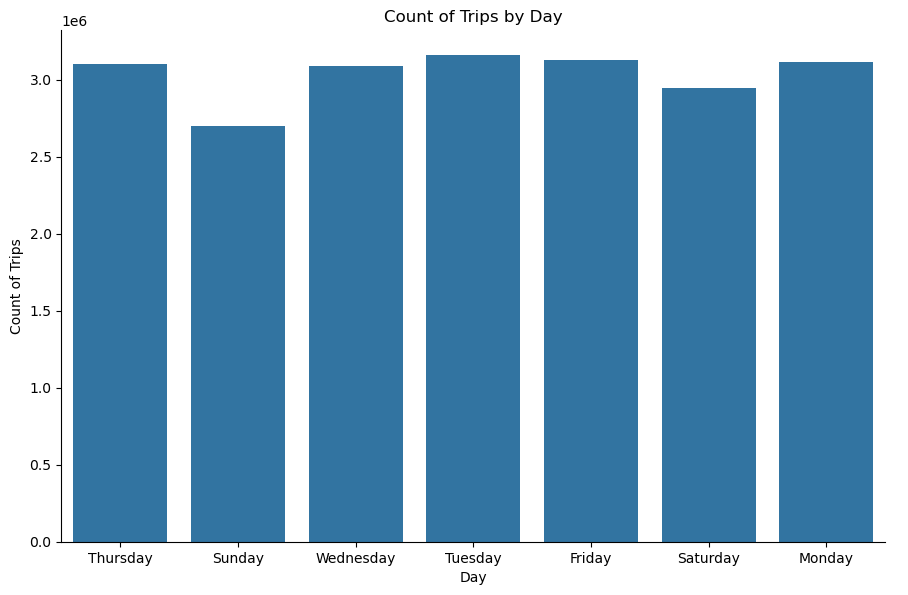

In [17]:
# A Plot shows the number of trips by day of week
sns.catplot(x='day', kind='count', data=df, height=6, aspect=1.5)
plt.title('Count of Trips by Day')
plt.xlabel('Day')
plt.ylabel('Count of Trips')
plt.show()

## Note:
### From the plot above, bike rentals show no significant difference among the days of the week, except for Sunday, which has the lowest usage.


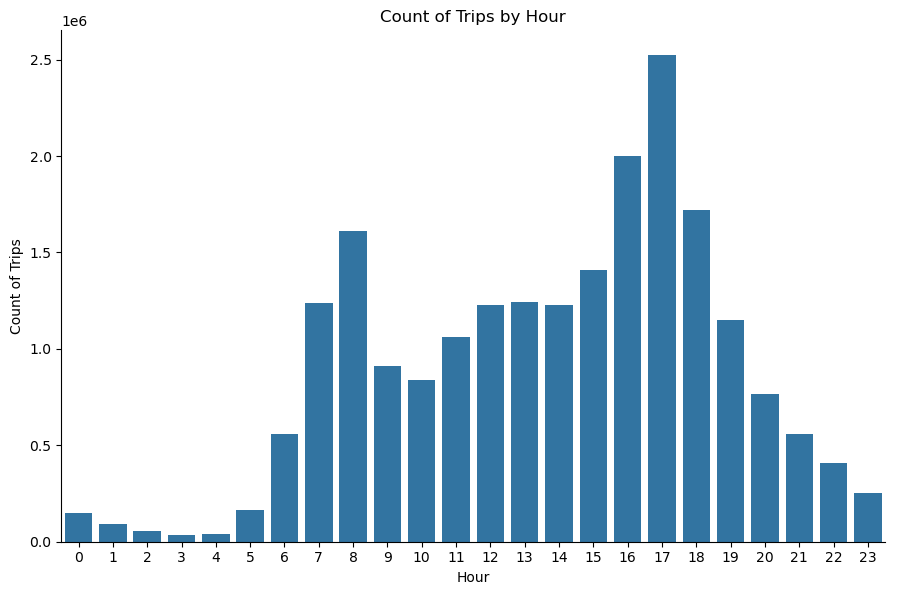

In [18]:
# A Plot shows the number of trips by hour of the day
sns.catplot(x='hour_start', kind='count', data=df, height=6, aspect=1.5)
plt.title('Count of Trips by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Trips')
plt.show()

## Note:
### We can see there are two peaks for bike rentals. The first starts early in the morning at 6:00 and reaches its peak at 8:00. 
### The second peak is in the afternoon, starting at 15:00 and reaching its highest point at 17:00, when people come back home after work or school.

In [21]:
df['to_station_id'].nunique()

626

In [22]:
df['to_station_name'].nunique()

743

In [33]:
# check for the most and least popular start stations
df['from_station_name'].value_counts().sort_values(ascending=False)

from_station_name
Streeter Dr & Grand Ave           322483
Lake Shore Dr & Monroe St         296184
Clinton St & Washington Blvd      285063
Canal St & Adams St               274589
Theater on the Lake               248878
                                   ...  
Michigan Ave & 71st St                12
South Chicago Ave & Elliot Ave        12
Elizabeth St & 59th St                 8
Damen Ave & Garfield Blvd              7
Phillips Ave & 82nd St                 5
Name: count, Length: 743, dtype: int64

In [32]:
# check for the most and least popular destination stations
df['to_station_name'].value_counts().sort_values(ascending=False)

to_station_name
Streeter Dr & Grand Ave           365427
Clinton St & Washington Blvd      280581
Lake Shore Dr & Monroe St         273658
Theater on the Lake               267744
Canal St & Adams St               264674
                                   ...  
Michigan Ave & 71st St                16
Elizabeth St & 59th St                13
South Chicago Ave & Elliot Ave        10
Phillips Ave & 82nd St                10
Damen Ave & Garfield Blvd              6
Name: count, Length: 743, dtype: int64

In [34]:
# In this step, I want to flage each station to its distict in Chicago. This will minimize the number of stations to the number of disticts
# for better visualization.
df['from_station_name'].unique()

array(['Wilton Ave & Belmont Ave', 'Clark St & Schiller St',
       'Marine Dr & Ainslie St', 'Ashland Ave & Blackhawk St',
       'Larrabee St & Kingsbury St', 'Morgan St & 31st St',
       'Canal St & Madison St', 'Ashland Ave & Grand Ave',
       'Ogden Ave & Chicago Ave', 'Michigan Ave & Oak St',
       'Clinton St & Washington Blvd', 'Sheridan Rd & Irving Park Rd',
       'Noble St & Milwaukee Ave', 'Aberdeen St & Jackson Blvd',
       'Morgan St & Polk St', 'Blue Island Ave & 18th St',
       'Wabash Ave & Grand Ave', 'Sangamon St & Washington Blvd',
       'Aberdeen St & Madison St', 'Daley Center Plaza',
       'State St & Harrison St', 'Dearborn Pkwy & Delaware Pl',
       'State St & 16th St', 'Stetson Ave & South Water St',
       'Hermitage Ave & Polk St', 'St Clair St & Erie St',
       'Lake Shore Dr & Monroe St', 'Wells St & Erie St',
       'Franklin St & Arcade Pl', 'Green St & Randolph St',
       'Michigan Ave & Congress Pkwy', 'Michigan Ave & Lake St',
       'Orlea

In [35]:
# Create dictionary with station with its corresponding districts:
districts = {
    'Wilton Ave & Belmont Ave': 'Lakeview',
    'Clark St & Schiller St': 'Lincoln Park',
    'Marine Dr & Ainslie St': 'Uptown',
    'Ashland Ave & Blackhawk St': 'Lincoln Square',
    'Larrabee St & Kingsbury St': 'River North',
    'Morgan St & 31st St': 'Bridgeport',
    'Canal St & Madison St': 'West Loop Gate',
    'Ashland Ave & Grand Ave': 'West Town',
    'Ogden Ave & Chicago Ave': 'West Town',
    'Michigan Ave & Oak St': 'Gold Coast',
    'Clinton St & Washington Blvd': 'West Loop Gate',
    'Sheridan Rd & Irving Park Rd': 'Uptown',
    'Noble St & Milwaukee Ave': 'Wicker Park',
    'Aberdeen St & Jackson Blvd': 'West Loop Gate',
    'Morgan St & Polk St': 'West Loop Gate',
    'Blue Island Ave & 18th St': 'Pilsen',
    'Wabash Ave & Grand Ave': 'River North',
    'Sangamon St & Washington Blvd': 'West Loop Gate',
    'Aberdeen St & Madison St': 'West Loop Gate',
    'Daley Center Plaza': 'Loop',
    'State St & Harrison St': 'Loop',
    'Dearborn Pkwy & Delaware Pl': 'Gold Coast',
    'State St & 16th St': 'South Loop',
    'Stetson Ave & South Water St': 'Loop',
    'Hermitage Ave & Polk St': 'West Loop Gate',
    'St Clair St & Erie St': 'Streeterville',
    'Lake Shore Dr & Monroe St': 'Loop',
    'Wells St & Erie St': 'River North',
    'Franklin St & Arcade Pl': 'River North',
    'Green St & Randolph St': 'Loop',
    'Michigan Ave & Congress Pkwy': 'South Loop',
    'Michigan Ave & Lake St': 'Loop',
    'Orleans St & Merchandise Mart Plaza': 'River North',
    'Greenview Ave & Fullerton Ave': 'Lincoln Park',
    'Loomis St & Taylor St': 'Little Italy',
    'Wabash Ave & Roosevelt Rd': 'South Loop',
    'Pine Grove Ave & Addison St': 'Lakeview',
    'Damen Ave & Madison St': 'West Loop Gate',
    'Franklin St & Jackson Blvd': 'Loop',
    'Clark St & Lincoln Ave': 'Lincoln Park',
    'State St & Van Buren St': 'Loop',
    'Clark St & Wellington Ave': 'Lakeview',
    'Fairbanks Ct & Grand Ave': 'River North',
    'Cityfront Plaza & N Water St': 'Streeterville',
    'LaSalle St & Washington St': 'Loop',
    'Dearborn St & Adams St': 'Loop',
    'State St & Erie St': 'River North',
    'Franklin St & Lake St': 'Loop',
    'Halsted St & Madison St': 'Greektown',
    'Dearborn St & Monroe St': 'Loop',
    'Cannon Dr & Fullerton Ave': 'Lincoln Park',
    'Ashland Ave & Armitage Ave': 'Wicker Park',
    'Damen Ave & Pierce Ave': 'Wicker Park',
    'Sheffield Ave & Wellington Ave': 'Lakeview',
    'Wolcott Ave & Lawrence Ave': 'Ravenswood',
    'Morgan St & Lake St': 'West Loop Gate',
    'Wood St & Taylor St': 'Little Italy',
    'Damen Ave & Leland Ave': 'Ravenswood',
    'Wells St & Concord Ln': 'River North',
    'Clark St & Randolph St': 'Loop',
    'Franklin St & Chicago Ave': 'River North',
    'Canal St & Adams St': 'Loop',
    'Mies van der Rohe Way & Chicago Ave': 'River North',
    'Clark St & Chicago Ave': 'River North',
    'Clark St & Congress Pkwy': 'South Loop',
    'Larrabee St & North Ave': 'Old Town',
    'Bissell St & Armitage Ave': 'Lincoln Park',
    'State St & Wacker Dr': 'Loop',
    'Clark St & Elm St': 'Gold Coast',
    'Columbus Dr & Randolph St': 'Loop',
    'May St & Fulton St': 'West Loop Gate',
    'Sedgwick St & Huron St': 'Gold Coast',
    'Clinton St & Roosevelt Rd': 'South Loop',
    'Ravenswood Ave & Irving Park Rd': 'North Center',
    'Canal St & Harrison St': 'Loop',
    'Wilton Ave & Diversey Pkwy': 'Lakeview',
    'Ashland Ave & Division St': 'Wicker Park',
    'Clinton St & Lake St': 'West Loop Gate',
    'Indiana Ave & Roosevelt Rd': 'South Loop',
    'Franklin St & Quincy St': 'West Loop Gate',
    'Canal St & Jackson Blvd': 'Loop',
    'Jefferson St & Monroe St': 'Loop',
    'Lake Park Ave & 56th St': 'Hyde Park',
    'LaSalle St & Illinois St': 'River North',
    'Halsted St & 18th St': 'Pilsen',
    'Wood St & Milwaukee Ave': 'Wicker Park',
    'Orleans St & Elm St': 'River North',
    'Lake Shore Dr & North Blvd': 'Lincoln Park',
    'Sheridan Rd & Montrose Ave': 'Uptown',
    'Wells St & Evergreen Ave': 'River North',
    'Martin Luther King Dr & Oakwood Blvd': 'Bronzeville',
    'Damen Ave & Wellington Ave': 'Lakeview',
    'Clinton St & Madison St': 'West Loop Gate',
    'Michigan Ave & Pearson St': 'Streeterville',
    'Morgan St & 18th St': 'Pilsen',
    'Clinton St & Tilden St': 'South Loop',
    'Halsted St & 35th St': 'Bridgeport',
    'Millennium Park': 'Loop',
    'Michigan Ave & Jackson Blvd': 'South Loop',
    'Ravenswood Ave & Berteau Ave': 'Ravenswood',
    'Clark St & North Ave': 'Old Town',
    'Sheffield Ave & Addison St': 'Wrigleyville',
    'Desplaines St & Kinzie St': 'West Loop Gate',
    'Damen Ave & Augusta Blvd': 'West Town',
    'Halsted St & Dickens Ave': 'Lincoln Park',
    'Sedgwick St & North Ave': 'Old Town',
    'Lake Shore Dr & Diversey Pkwy': 'Lincoln Park',
    'Logan Blvd & Elston Ave': 'Logan Square',
    'Theater on the Lake': 'Lincoln Park',
    'State St & Randolph St': 'Loop',
    'Morgan Ave & 14th Pl': 'Pilsen',
    'Halsted St & Blackhawk St': 'Lakeview',
    'Racine Ave & Congress Pkwy': 'West Loop Gate',
    'Michigan Ave & Washington St': 'Loop',
    'Lincoln Ave & Eastwood Ave': 'Lincoln Square',
    'Wells St & Ohio St': 'River North',
    'Clark St & Montrose Ave': 'Uptown',
    'Sedgwick St & Webster Ave': 'Lincoln Park',
    'Lake Shore Dr & Ohio St': 'Streeterville',
    'May St & Randolph St': 'West Loop Gate',
    'Clybourn Ave & Division St': 'Old Town',
    'Western Ave & Leland Ave': 'Ravenswood',
    'Lake Park Ave & 47th St': 'Kenwood',
    'Damen Ave & Division St': 'Wicker Park',
    'Adler Planetarium': 'Museum Campus',
    'Leavitt St & North Ave': 'West Town',
    'Southport Ave & Waveland Ave': 'Lakeview',
    'Seeley Ave & Roscoe St': 'Lakeview',
    'Carpenter St & Huron St': 'West Loop Gate',
    'Clark St & Leland Ave': 'Uptown',
    'Clifton Ave & Armitage Ave': 'Lincoln Park',
    'Ada St & Washington Blvd': 'West Loop Gate',
    'Larrabee St & Armitage Ave': 'Lincoln Park',
    'Racine Ave & 15th St': 'Pilsen',
    'Southport Ave & Roscoe St': 'Lakeview',
    'State St & Kinzie St': 'River North',
    'Kimbark Ave & 53rd St': 'Hyde Park',
    'Dayton St & North Ave': 'Old Town',
    'LaSalle St & Jackson Blvd': 'Loop',
    'Broadway & Belmont Ave': 'Lakeview',
    'Damen Ave & Chicago Ave': 'West Town',
    'Hampden Ct & Diversey Pkwy': 'Lincoln Park',
    'Sheffield Ave & Fullerton Ave': 'Lincoln Park',
    'Ogden Ave & Race Ave': 'West Loop Gate',
    'Broadway & Barry Ave': 'Lakeview',
    'Damen Ave & Cortland Ave': 'Wicker Park',
    'Eckhart Park': 'West Town',
    'Pine Grove Ave & Irving Park Rd': 'North Center',
    'Milwaukee Ave & Rockwell St': 'Logan Square',
    'Sheffield Ave & Kingsbury St': 'River North',
    'Western Ave & Division St': 'Ukrainian Village',
    'Calumet Ave & 18th St': 'South Loop',
    'Lincoln Ave & Belle Plaine Ave': 'North Center',
    'Halsted St & Waveland Ave': 'Lakeview',
    'Lincoln Ave & Diversey Pkwy': 'Lakeview',
    'State St & Pearson St': 'Streeterville',
    'Kingsbury St & Erie St': 'River North',
    'Wabash Ave & 8th St': 'South Loop',
    '900 W Harrison': 'West Loop Gate',
    'Ellis Ave & 58th St': 'Hyde Park',
    'McClurg Ct & Illinois St': 'Near North Side',
    'Broadway & Cornelia Ave': 'Lakeview',
    'Wood St & Division St': 'Wicker Park',
    'Racine Ave & Belmont Ave': 'Lakeview',
    'Calumet Ave & 33rd St': 'Bronzeville',
    'Halsted St & Wrightwood Ave': 'Lincoln Park',
    'Lincoln Ave & Roscoe St': 'Lakeview',
    'Wabash Ave & Cermak Rd': 'Near South Side',
    'Loomis St & Lexington St': 'West Loop Gate',
    'Sheffield Ave & Willow St': 'Lakeview',
    'Lake Shore Dr & Belmont Ave': 'Lakeview',
    'Wood St & North Ave': 'Wicker Park',
    'State St & 19th St': 'South Loop',
    'Larrabee St & Webster Ave': 'Lincoln Park',
    'Racine Ave & Fullerton Ave': 'Lincoln Park',
    'Emerald Ave & 31st St': 'Bronzeville',
    'Lincoln Ave & Fullerton Ave': 'Lincoln Park',
    'Halsted St & James M Rochford St': 'Near West Side',
    'Southport Ave & Clybourn Ave': 'Lincoln Park',
    'Canal St & Monroe St': 'Loop',
    'Michigan Ave & Madison St': 'Loop',
    'Ashland Ave & 13th St': 'Near West Side',
    'Halsted St & 21st St': 'Pilsen',
    'Southport Ave & Irving Park Rd': 'Lakeview',
    'Shore Drive & 55th St': 'Hyde Park',
    'Broadway & Sheridan Rd': 'Lakeview',
    'Sheffield Ave & Wrightwood Ave': 'Lakeview',
    'Halsted St & Diversey Pkwy': 'Lincoln Park',
    'Michigan Ave & 18th St': 'Near South Side',
    'McCormick Place': 'Near South Side',
    'Wolcott Ave & Polk St': 'Near West Side',
    'Halsted St & Willow St': 'Lincoln Park',
    'Racine Ave & 18th St': 'Pilsen',
    'Peoria St & Jackson Blvd': 'West Loop Gate',
    'Stave St & Armitage Ave': 'Lincoln Park',
    'Clark St & Wrightwood Ave': 'Lincoln Park',
    'Wells St & Walton St': 'Near North Side',
    'Damen Ave & Grand Ave': 'West Town',
    'Halsted St & Archer Ave': 'Bridgeport',
    'Lakeview Ave & Fullerton Pkwy': 'Lincoln Park',
    'State St & 33rd St': 'Bronzeville',
    'Sheffield Ave & Webster Ave': 'Lakeview',
    'Sheridan Rd & Buena Ave': 'Uptown',
    'Paulina St & Diversey Pkwy': 'Lakeview',
    'Halsted St & Polk St': 'Near West Side',
    'Ashland Ave & Chicago Ave': 'West Town',
    'Milwaukee Ave & Wabansia Ave': 'Logan Square',
    'Wentworth Ave & Archer Ave': 'Bridgeport',
    'Broadway & Wilson Ave': 'Uptown',
    'Stockton Dr & Wrightwood Ave': 'Lincoln Park',
    'Museum Campus': 'Museum Campus',
    'Blackstone Ave & Hyde Park Blvd': 'Hyde Park',
    'Damen Ave & Melrose Ave': 'Ravenswood',
    'Prairie Ave & Garfield Blvd': 'Washington Park',
    'May St & Taylor St': 'Little Italy',
    'Clarendon Ave & Junior Ter': 'Uptown',
    'Lincoln Ave & Belmont Ave': 'Lakeview',
    'Racine Ave & Wrightwood Ave': 'Lincoln Park',
    'Paulina St & 18th St': 'Pilsen',
    'Southport Ave & Belmont Ave': 'Lakeview',
    'Halsted St & Roscoe St': 'Lakeview',
    'Greenwood Ave & 47th St': 'Kenwood',
    'Halsted St & Maxwell St': 'Near West Side',
    'Green St & Milwaukee Ave': 'West Loop Gate',
    'Southport Ave & Wellington Ave': 'Lakeview',
    'Ashland Ave & Wellington Ave': 'Lakeview',
    'Clifton Ave & Lawrence Ave': 'Uptown',
    'Damen Ave & Charleston St': 'Ravenswood',
    'Ravenswood Ave & Montrose Ave': 'Ravenswood',
    'Clark St & Winnemac Ave': 'Uptown',
    'Wood St & Grand Ave': 'West Town',
    'Damen Ave & Sunnyside Ave': 'Ravenswood',
    'Michigan Ave & 14th St': 'Near South Side',
    'Ashland Ave & Lake St': 'West Town',
    'Kedzie Ave & Milwaukee Ave': 'Logan Square',
    'Kedzie Ave & Palmer Ct': 'Logan Square',
    'Clark St & Waveland Ave': 'Wrigleyville',
    'Ashland Ave & Wrightwood Ave': 'Lakeview',
    'Lincoln Ave & Leavitt St': 'Lincoln Square',
    'Ashland Ave & Grace St': 'Logan Square',
    'Racine Ave & 13th St': 'Near West Side',
    'Lincoln Ave & Armitage Ave': 'Lincoln Park',
    'Lincoln Ave & Waveland Ave': 'Lakeview',
    'Wells St & Polk St': 'Near West Side',
    'Leavitt St & Hirsch St': 'Lincoln Square',
    'Ashland Ave & Belle Plaine Ave': 'Lincoln Square',
    'California Ave & Milwaukee Ave': 'Logan Square',
    'Streeter Dr & Illinois St': 'Near North Side',
    'Loomis St & Jackson Blvd': 'West Loop Gate',
    'Emerald Ave & 28th St': 'Bronzeville',
    'Lake Shore Dr & Wellington Ave': 'Lakeview',
    'Claremont Ave & Hirsch St': 'Uptown',
    'Martin Luther King Dr & 29th St': 'Bronzeville',
    'California Ave & Francis Pl': 'North Center',
    'Ashland Ave & Augusta Blvd': 'Wicker Park',
    'Western Ave & Winnebago Ave': 'Bucktown',
    'Congress Pkwy & Ogden Ave': 'West Loop Gate',
    'May St & Cullerton St': 'Pilsen',
    'Southport Ave & Wrightwood Ave': 'Lakeview',
    'Indiana Ave & 31st St': 'Bronzeville',
    'Rhodes Ave & 32nd St': 'Bronzeville',
    'Cottage Grove Ave & Oakwood Blvd': 'Bronzeville',
    'Paulina St & Montrose Ave': 'Ravenswood',
    'Lincoln Ave & Addison St': 'Lakeview',
    'Sheridan Rd & Lawrence Ave': 'Uptown',
    'Southport Ave & Clark St': 'Lakeview',
    'Woodlawn Ave & 55th St': 'Hyde Park',
    'Fort Dearborn Dr & 31st St': 'Bronzeville',
    'Larrabee St & Menomonee St': 'Lincoln Park',
    'California Ave & Division St': 'Logan Square',
    'Leavitt St & Armitage Ave': 'Logan Square',
    'California Ave & North Ave': 'Humboldt Park',
    'Normal Ave & Archer Ave': 'McKinley Park',
    'Wallace Ave & 35th St': 'Bridgeport',
    'Clinton St & 18th St': 'Pilsen',
    'Sedgwick St & Schiller St': 'Old Town',
    'State St & 35th St': 'Bronzeville',
    'Montrose Harbor': 'Uptown',
    'Halsted St & 37th St': 'Bridgeport',
    'Broadway & Argyle St': 'Uptown',
    'Broadway & Berwyn Ave': 'Edgewater',
    'Clarendon Ave & Leland Ave': 'Uptown',
    'King Dr & 47th St': 'Bronzeville',
    'California Ave & 21st St': 'Pilsen',
    'Campbell Ave & North Ave': 'Logan Square',
    'Wells St & 19th St': 'Pilsen',
    'Western Ave & 21st St': 'Pilsen',
    'Greenview Ave & Diversey Pkwy': 'Wicker Park',
    'Indiana Ave & 26th St': 'Bronzeville',
    'Cottage Grove Ave & 51st St': 'Hyde Park',
    'Cottage Grove Ave & 47th St': 'Hyde Park',
    'Calumet Ave & 35th St': 'Bronzeville',
    'Ashland Ave & 21st St': 'Pilsen',
    'Damen Ave & Coulter St': 'Wicker Park',
    'State St & 29th St': 'Bronzeville',
    'Wentworth Ave & 24th St': 'Chinatown',
    'Clarendon Ave & Gordon Ter': 'Uptown',
    'Damen Ave & Cullerton St': 'Pilsen',
    'Western Ave & 24th St': 'Pilsen',
    'Indiana Ave & 40th St': 'Bronzeville',
    'Cottage Grove Ave & 43rd St': 'Grand Boulevard',
    'Clark St & Armitage Ave': 'Lincoln Park',
    'Damen Ave & Cortland St': 'Wicker Park',
    'Ogden Ave & Congress Pkwy': 'West Loop Gate',
    'Marshfield Ave & Cortland St': 'Wicker Park',
    'Pine Grove Ave & Waveland Ave': 'Lakeview',
    'Wells St & Hubbard St': 'River North',
    'Wabash Ave & Wacker Pl': 'Loop',
    'Clark St & Grace St': 'Lincoln Park',
    'Ravenswood Ave & Lawrence Ave': 'Ravenswood',
    'MLK Jr Dr & 29th St': 'Bronzeville',
    'Union Ave & Grand Ave': 'Near West Side',
    'Cityfront Plaza Dr & Pioneer Ct': 'Loop',
    'Leavitt St & Lawrence Ave': 'Ravenswood',
    'Racine Ave & 19th St': 'Pilsen',
    'MLK Jr Dr & Oakwood Blvd': 'Bronzeville',
    'Damen Ave & Clybourn Ave': 'Wicker Park',
    'MLK Jr Dr & 47th St': 'Bronzeville',
    '900 W Harrison St': 'Near West Side',
    'Broadway & Waveland Ave': 'Lakeview',
    'St. Clair St & Erie St': 'Streeterville',
    'Michigan Ave & 16th St': 'Near South Side',
    'Dearborn St & Erie St': 'River North',
    'Wallace St & 35th St': 'Bridgeport',
    'Ellis Ave & 55th St': 'Hyde Park',
    'Loomis St & Archer Ave': 'Bridgeport',
    'Racine Ave & 35th St': 'Bridgeport',
    'Ashland Ave & Archer Ave': 'Bridgeport',
    'Leavitt St & Archer Ave': 'Bridgeport',
    'Wentworth Ave & 33rd St': 'Bridgeport',
    'Union Ave & 42nd St': 'Bronzeville',
    'Wood St & 35th St': 'Bridgeport',
    'State St & Pershing Rd': 'Bronzeville',
    'Dorchester Ave & 49th St': 'Kenwood',
    'Prairie Ave & 43rd St': 'Kenwood',
    'Halsted St & 47th Pl': 'Kenwood',
    'Woodlawn Ave & Lake Park Ave': 'Hyde Park',
    'Cornell Ave & Hyde Park B lvd': 'Hyde Park',
    'Lake Park Ave & 35th St': 'Hyde Park',
    'Lake Park Ave & 53rd St': 'Hyde Park',
    'Halsted St & 56th St': 'Hyde Park',
    'Princeton Ave & 47th St': 'Kenwood',
    'Ellis Ave & 60th St': 'Hyde Park',
    'Harper Ave & 59th St': 'Hyde Park',
    'University Ave & 57th St': 'Hyde Park',
    'Shields Ave & 43rd St': 'Bronzeville',
    'Princeton Ave & 31st St': 'Bronzeville',
    'Ellis Ave & 53rd St': 'Hyde Park',
    'Museum of Science and Industry': 'Hyde Park',
    'Wacker Dr & Washington St': 'Loop',
    'Clark St & Lake St': 'Loop',
    'Field Blvd & South Water St': 'Loop',
    'Wabash Ave & Adams St': 'Loop',
    'Calumet Ave & 51st St': 'Bronzeville',
    'Halsted St & 51st St': 'Washington Park',
    '63rd St Beach': 'Jackson Park Highlands',
    'Cottage Grove Ave & 71st St': 'South Shore',
    'Shedd Aquarium': 'Museum Campus',
    'Dusable Harbor': 'Loop',
    'Cottage Grove Ave & 63rd St': 'Woodlawn',
    'Kingsbury St & Kinzie St': 'River North',
    'Desplaines St & Randolph St': 'West Loop Gate',
    'Federal St & Polk St': 'South Loop',
    'Desplaines St & Jackson Blvd': 'West Loop Gate',
    'LaSalle St & Adams St': 'Loop',
    'Calumet Ave & 71st St': 'South Shore',
    'MLK Jr Dr & 63rd St': 'Woodlawn',
    'South Shore Dr & 67th St': 'South Shore',
    'South Shore Dr & 71st St': 'South Shore',
    'Rainbow Beach': 'South Chicago',
    'Halsted St & 63rd St': 'Woodlawn',
    'Dorchester Ave & 63rd St': 'Woodlawn',
    'Ogden Ave & Roosevelt Rd': 'Near West Side',
    'Kedzie Ave & Harrison St': 'Near West Side',
    'Ashland Ave & Harrison St': 'Near West Side',
    'Kedzie Ave & Roosevelt Rd': 'Near West Side',
    'Kedzie Ave & 21st St': 'Pilsen',
    'Kedzie Ave & 24th St': 'Pilsen',
    'Albany Ave & 26th St': 'Little Village',
    'Artesian Ave & Hubbard St': 'Humboldt Park',
    'Eberhart Ave & 61st St': 'Woodlawn',
    'Western Ave & Monroe St': 'Near West Side',
    'California Ave & Lake St': 'Humboldt Park',
    'Western Ave & Walton St': 'Humboldt Park',
    'Stony Island Ave & 75th St': 'South Shore',
    'Western Ave & Congress Pkwy': 'Near West Side',
    'Jeffery Blvd & 67th St': 'South Shore',
    'Princeton Ave & Garfield Blvd': 'Washington Park',
    'California Ave & 23rd Pl': 'Pilsen',
    'California Ave & 26th St': 'Little Village',
    'California Ave & Roosevelt Rd': 'Near West Side',
    'South Shore Dr & 74th St': 'South Shore',
    'Kedzie Ave & Lake St': 'Humboldt Park',
    'Central Park Ave & Ogden Ave': 'North Lawndale',
    'Stony Island Ave & 67th St': 'South Shore',
    'California Ave & Augusta Blvd': 'Logan Square',
    'Stony Island Ave & 71st St': 'South Shore',
    'Spaulding Ave & Armitage Ave': 'Logan Square',
    'Millard Ave & 26th St': 'Little Village',
    'Kosciuszko Park': 'Logan Square',
    'Jeffery Blvd & 71st St': 'South Shore',
    'Calumet Ave & 21st St': 'Pilsen',
    'Troy St & North Ave': 'Wicker Park',
    'Central Park Ave & North Ave': 'Austin',
    'Humboldt Blvd & Armitage Ave': 'Logan Square',
    'Spaulding Ave & Division St': 'Humboldt Park',
    'Kedzie Ave & Chicago Ave': 'Humboldt Park',
    'Drake Ave & Fullerton Ave': 'Lincoln Park',
    'Kimball Ave & Belmont Ave': 'Avondale',
    'Larrabee St & Division St': 'Wicker Park',
    'Halsted St & 69th St': 'Woodlawn',
    'Larrabee St & Oak St': 'Lincoln Park',
    'Jeffery Blvd & 76th St': 'South Chicago',
    'Cottage Grove Ave & 67th St': 'Woodlawn',
    'Saginaw Ave & Exchange Ave': 'North Lawndale',
    'California Ave & Fletcher St': 'Logan Square',
    'Talman Ave & Addison St': 'Portage Park',
    'Western Ave & Roscoe St': 'Roscoe Village',
    'Sawyer Ave & Irving Park Rd': 'Logan Square',
    'Central Park Ave & Elbridge Ave': 'North Lawndale',
    'Drake Ave & Montrose Ave': 'Ravenswood',
    'Rockwell St & Eastwood Ave': 'Lincoln Square',
    'Richmond St & Diversey Ave': 'Logan Square',
    'Washtenaw Ave & Lawrence Ave': 'Lincoln Square',
    'Kedzie Ave & Leland Ave': 'Albany Park',
    'Kedzie Ave & Foster Ave': 'Albany Park',
    'Troy St & Elston Ave': 'Logan Square',
    'Albany Ave & Bloomingdale Ave': 'Logan Square',
    'Lincoln Ave & Winona St': 'Uptown',
    'Manor Ave & Leland Ave': 'Ravenswood',
    'Budlong Woods Library': 'Lincoln Square',
    'Kedzie Ave & Montrose Ave': 'Albany Park',
    'Winchester Ave & Elston Ave': 'Lincoln Square',
    'Monticello Ave & Irving Park Rd': 'Albany Park',
    'Keeler Ave & Irving Park Rd': 'Irving Park',
    'Stony Island Ave & 64th St': 'Woodlawn',
    'Michigan Ave & Balbo Ave': 'Grant Park',
    'Financial Pl & Congress Pkwy': 'Loop',
    'Rush St & Hubbard St': 'River North',
    'McClurg Ct & Erie St': 'Streeterville',
    'Mies van der Rohe Way & Chestnut St': 'The Loop',
    'Clinton St & Polk St': 'West Loop',
    'Rush St & Superior St': 'Gold Coast',
    'Rush St & Cedar St': 'Gold Coast',
    'Ritchie Ct & Banks St': 'Lincoln Park',
    'MLK Jr Dr & 56th St': 'Hyde Park',
    'Shields Ave & 28th Pl': 'Bridgeport',
    'Broadway & Granville Ave': 'Edgewater',
    'Broadway & Ridge Ave': 'Edgewater',
    'Lakefront Trail & Bryn Mawr Ave': 'Edgewater',
    'Clark St & Bryn Mawr Ave': 'Edgewater',
    'Lawndale Ave & 23rd St': 'Little Village',
    'Clark St & Elmdale Ave': 'Ravenswood',
    'Broadway & Thorndale Ave': 'Edgewater',
    'Clark St & Columbia Ave': 'Ravenswood',
    'Yates Blvd & 75th St': 'South Shore',
    'Perry Ave & 69th St': 'South Shore',
    'Clark St & Schreiber Ave': 'Ravenswood',
    'Western Ave & Granville Ave': 'North Center',
    '2112 W Peterson Ave': 'North Center',
    'Maplewood Ave & Peterson Ave': 'North Center',
    'Oakley Ave & Irving Park Rd': 'North Center',
    'Warren Park East': 'Lincoln Square',
    'Warren Park West': 'Lincoln Square',
    'Leavitt St & Addison St': 'Lincoln Square',
    'Pulaksi Rd & Eddy St': 'Avondale',
    'Drake Ave & Addison St': 'Lincoln Square',
    'Damen Ave & Foster Ave': 'North Center',
    'California Ave & Altgeld St': 'Avondale',
    'Avers Ave & Belmont Ave': 'Avondale',
    'Clark St & Berwyn Ave': 'Lakeview',
    'Ravenswood Ave & Balmoral Ave': 'Ravenswood',
    'Campbell Ave & Montrose Ave': 'Ravenswood',
    'Francisco Ave & Foster Ave': 'North Center',
    'Clark St & Lunt Ave': 'Ravenswood',
    'Sheridan Rd & Loyola Ave': 'Rogers Park',
    'Sacramento Blvd & Franklin Blvd': 'Humboldt Park',
    'Sheridan Rd & Greenleaf Ave': 'Rogers Park',
    'Western Ave & Lunt Ave': 'Ravenswood',
    'Glenwood Ave & Morse Ave': 'Rogers Park',
    'Ridge Blvd & Touhy Ave': 'Rogers Park',
    'Burnham Harbor': 'The Loop',
    'Keystone Ave & Montrose Ave': 'Ravenswood',
    'Christiana Ave & Lawrence Ave': 'Ravenswood',
    'Halsted St & North Branch St': 'Lincoln Square',
    'St. Louis Ave & Balmoral Ave': 'Ravenswood',
    'Princeton Ave & China Pl': 'Humboldt Park',
    'Clark St & Touhy Ave': 'Rogers Park',
    'Wentworth Ave & 63rd St': 'Englewood',
    'Kedzie Ave & Bryn Mawr Ave': 'Edgewater',
    'Western Ave & 28th St': 'Bridgeport',
    'Campbell Ave & Fullerton Ave': 'Ravenswood',
    'Washtenaw Ave & 15th St': 'Pilsen',
    'Wells St & Elm St': 'Old Town',
    'Green St (Halsted St) & Madison St': 'The Loop',
    'Wells St & Concord Pl': 'Old Town',
    'Shields Ave & 31st St': 'Bridgeport',
    'Cornell Ave & Hyde Park Blvd': 'Hyde Park',
    'Elston Ave & Wabansia Ave': 'Bucktown',
    'Aberdeen St & Monroe St (Madison St)': 'The Loop',
    'Paulina Ave (Wood St) & North Ave': 'Wicker Park',
    'Buckingham Fountain': 'The Loop',
    'Franklin St & Monroe St': 'The Loop',
    'Humboldt Dr & Luis Munoz Marin Dr': 'Humboldt Park',
    'Wabash Ave (State St) & 16th St': 'Loop',
    'Halsted St & Roosevelt Rd': 'University Village',
    'Canal St & Taylor St': 'University Village',
    'Fairfield Ave & Roosevelt Rd': 'University Village',
    'Pulaski Rd & Eddy St': 'Avondale',
    'DuSable Museum': 'Hyde Park',
    'California Ave & Byron St': 'Avondale',
    'California Ave & Montrose Ave': 'Avondale',
    'Clark St & 9th St (AMLI)': 'Loop',
    'Ravenswood Ave & Montrose Ave (*)': 'Ravenswood',
    'Orleans St & Ohio St': 'River North',
    'Sangamon St & Washington Blvd (*)': 'West Loop',
    'Shore Dr & 55th St': 'Hyde Park',
    'Streeter Dr & Grand Ave': 'Streeterville',
    'Washtenaw Ave & 15th St (*)': 'Pilsen',
    'Wabash Ave & 16th St': 'Loop',
    'Wells St & Huron St': 'Old Town',
    'Aberdeen St & Monroe St': 'West Loop',
    'Paulina Ave & North Ave': 'Lakeview',
    'Canal St & Monroe St (*)': 'Loop',
    'Orleans St & Elm St (*)': 'River North',
    'Green St & Madison St': 'West Loop',
    'Halsted St & 35th St (*)': 'Bridgeport',
    'Halsted St & Blackhawk St (*)': 'Bridgeport',
    'Loomis St & Taylor St (*)': 'University Village',
    'Conservatory Dr & Lake St': 'Lincoln Park',
    'Clinton St & Polk St (*)': 'University Village',
    'MLK Jr Dr & 56th St (*)': 'Washington Park',
    'Pulaski Rd & Madison St': 'Avondale',
    'Kenton Ave & Madison St': 'Avondale',
    'Austin Blvd & Lake St': 'Austin',
    'Laramie Ave & Kinzie St': 'Austin',
    'Laramie Ave & Madison St': 'Austin',
    'Central Park Blvd & 5th Ave': 'Austin',
    'Kostner Ave & Lake St': 'Austin',
    'Kostner Ave & Adams St': 'Austin',
    'Central Ave & Harrison St': 'Austin',
    'Pulaski Rd & Lake St': 'Avondale',
    'Cicero Ave & Flournoy St': 'South Lawndale',
    'Mason Ave & Madison St': 'South Lawndale',
    'Damen Ave & Pershing Rd': 'McKinley Park',
    'Cicero Ave & Quincy St': 'South Lawndale',
    'Laramie Ave & Gladys Ave': 'Austin',
    'Cicero Ave & Lake St': 'South Lawndale',
    'Ashland Ave & Pershing Rd': 'McKinley Park',
    'Pulaski Rd & Congress Pkwy': 'Avondale',
    'Western Blvd & 48th Pl': 'Brighton Park',
    'Hoyne Ave & 47th St': 'Brighton Park',
    'Ashland Ave & McDowell Ave': 'McKinley Park',
    'Morgan St & Pershing Rd': 'McKinley Park',
    'Ashland Ave & 50th St': 'McKinley Park',
    'Racine Ave & Garfield Blvd': 'West Englewood',
    'Damen Ave & 51st St': 'West Englewood',
    'Central Ave & Madison St': 'Austin',
    'Ashland Ave & 66th St': 'West Englewood',
    'State St & 76th St': 'Chatham',
    'Throop St & 52nd St': 'West Englewood',
    'Ashland Ave & 63rd St': 'West Englewood',
    'Normal Ave & 72nd St': 'West Englewood',
    'Ashland Ave & Garfield Blvd': 'West Englewood',
    'Elizabeth St & 47th St': 'Brighton Park',
    'Lombard Ave & Garfield St': 'West Englewood',
    'Oak Park Ave & Harrison St': 'Austin',
    'Damen Ave & 61st St': 'West Englewood',
    'Marshfield Ave & 59th St': 'West Englewood',
    'Lombard Ave & Madison St': 'West Englewood',
    'Wisconsin Ave & Madison St': 'West Englewood',
    'East Ave & Madison St': 'West Englewood',
    'East Ave & Garfield St': 'West Englewood',
    'Chicago Ave & Washington St': 'East Garfield Park',
    'Dodge Ave & Church St': 'Rogers Park',
    'Benson Ave & Church St': 'Rogers Park',
    'Ashland Ave & 69th St': 'West Englewood',
    'Central St Metra': 'Evanston',
    'Forest Ave & Lake St': 'Evanston',
    'Oak Park Ave & South Blvd': 'Oak Park',
    'Marion St & South Blvd': 'Oak Park',
    'Field Museum': 'Museum Campus',
    'Cuyler Ave & Augusta St': 'Lakeview',
    'Albany (Kedzie) Ave & Montrose Ave': 'Ravenswood',
    'Racine Ave & 65th St': 'West Englewood',
    'Avondale Ave & Irving Park Rd': 'Avondale',
    'Sheridan Rd & Noyes St (NU)': 'Evanston',
    'Chicago Ave & Sheridan Rd': 'Evanston',
    'Elmwood Ave & Austin St': 'Evanston',
    'University Library (NU)': 'Evanston',
    'Valli Produce - Evanston Plaza': 'Evanston',
    'Humphrey Ave & Ontario St': 'Evanston',
    'Forest Ave & Chicago Ave': 'Evanston',
    'Greenview Ave & Jarvis Ave': 'Rogers Park',
    'Wolcott Ave & Fargo Ave': 'Rogers Park',
    'Eastlake Ter & Rogers Ave': 'Rogers Park',
    'Bosworth Ave & Howard St': 'Rogers Park',
    'Central St & Girard Ave': 'Evanston',
    'Glenwood Ave & Touhy Ave': 'Rogers Park',
    'Paulina St & Howard St': 'Rogers Park',
    'Clark St & Jarvis Ave': 'Rogers Park',
    'Western Ave & Howard St': 'Rogers Park',
    'Wentworth Ave & 35th St': 'Grand Crossing',
    'Knox Ave & Montrose Ave': 'Ravenswood',
    'Milwaukee Ave & Cuyler Ave': 'Avondale',
    'Keystone Ave & Fullerton Ave': 'Avondale',
    'Oakley Ave & Touhy Ave': 'Avondale',
    'Woodlawn Ave & 75th St': 'Woodlawn',
    'Greenwood Ave & 79th St': 'Woodlawn',
    'Kilbourn Ave & Irving Park Rd': 'Avondale',
    'Austin Blvd & Chicago Ave': 'Austin',
    'Ridge Blvd & Howard St': 'Rogers Park',
    'Phillips Ave & 79th St': 'Woodlawn',
    'Central Ave & Chicago Ave': 'Austin',
    'Evans Ave & 75th St': 'Woodlawn',
    'Vernon Ave & 79th St': 'Woodlawn',
    'State St & 79th St': 'Chatham',
    'Central Ave & Lake St': 'Austin',
    'Cottage Grove Ave & 78th St': 'Chatham',
    'Ridgeland Ave & Lake St': 'Oak Park',
    'Exchange Ave & 79th St': 'Chatham',
    'Cottage Grove Ave & 83rd St': 'Chatham',
    'MLK Jr Dr & 83rd St': 'Chatham',
    'Damen Ave & Garfield Blvd': 'West Englewood',
    'Vernon Ave & 75th St': 'Woodlawn',
    'Racine Ave & 61st St': 'West Englewood',
    'Stony Island Ave & 82nd St': 'South Shore',
    'Wabash Ave & 87th St': 'Chatham',
    'Ellis Ave & 83rd St': 'Chatham',
    'Halsted St & 59th St': 'West Englewood',
    'Stony Island Ave & South Chicago Ave': 'South Shore',
    'Marshfield Ave & 44th St': 'West Englewood',
    'Phillips Ave & 82nd St': 'South Shore',
    'South Chicago Ave & 83rd St': 'South Shore',
    'Halsted St & Clybourn Ave': 'Near North Side',
    'Wood St & Chicago Ave (*)': 'West Town',
    'Sheridan Rd & Columbia Ave': 'Edgewater',
    'Lakefront Trail & Wilson Ave': 'Uptown',
    'Wood St & Augusta Blvd': 'West Town',
    'Walsh Park': 'West Town',
    'Lincoln Ave & Sunnyside Ave': 'Uptown',
    'Franklin St & Adams St (Temp)': 'Loop',
    'Bernard St & Elston Ave': 'Logan Square',
    'Archer (Damen) Ave & 37th St': 'Bridgeport',
    'Clark St & Drummond Pl': 'Lincoln Park',
    'Aberdeen St & Randolph St': 'West Loop',
    'Albany Ave & Montrose Ave': 'Albany Park',
    'Honore St & Division St': 'West Town',
    'Racine Ave & Washington Blvd (*)': 'West Loop',
    'Orleans St & Hubbard St': 'River North',
    'Franklin St & Chicago Ave (Temp)': 'Near North Side',
    'Paulina St & Flournoy St': 'Near West Side',
    'Wolcott (Ravenswood) Ave & Montrose Ave': 'Ravenswood',
    'Damen Ave & Thomas St (Augusta Blvd)': 'West Town',
    'Burling St (Halsted) & Diversey Pkwy (Temp)': 'Lincoln Park',
    'Winchester (Ravenswood) Ave & Balmoral Ave': 'Ravenswood',
    'Clark St & Ida B Wells Dr': 'Loop',
    'Dearborn St & Van Buren St': 'Loop',
    'Delano Ct & Roosevelt Rd': 'Near South Side',
    'Pulaski Rd & Eddy St (Temp)': 'Avondale',
    'Michigan Ave & Ida B Wells Dr': 'Loop',
    'Damen Ave & Walnut (Lake) St (*)': 'West Town',
    'Winthrop Ave & Lawrence Ave': 'Uptown',
    'Malcolm X College': 'Near West Side',
    'Western Ave & Fillmore St (*)': 'East Garfield Park',
    'Leavitt St & Chicago Ave': 'West Town',
    'Fairbanks St & Superior St': 'Streeterville',
    'Clark St & Newport St': 'Lakeview',
    'Elizabeth (May) St & Fulton St': 'West Loop',
    'Phillips Ave & 83rd St': 'Chatham',
    'Hoyne Ave & Balmoral Ave': 'Ravenswood',
    'Financial Pl & Ida B Wells Dr': 'Loop',
    'Chicago Ave & Dempster St': 'Evanston',
    'Austin Blvd & Madison St': 'Austin',
    'Leavitt St & Division St (*)': 'West Town',
    'Smith Park (*)': 'West Town',
    'Wentworth Ave & Cermak Rd (Temp)': 'Bridgeport',
    'Lincolnwood Dr & Central St': 'Lincolnwood',
    'Halsted St & Clybourn Ave (*)': 'Near North Side',
    'Dearborn St & Van Buren St (*)': 'Loop',
    'MLK Jr Dr & Pershing Rd': 'Douglas',
    'Wentworth Ave & 24th St (Temp)': 'Bridgeport',
    'Central Park Ave & Bloomingdale Ave': 'Humboldt Park',
    'Dodge Ave & Mulford St': 'Evanston',
    'Evanston Civic Center': 'Evanston',
    'Leavitt St & Belmont Ave (*)': 'Lakeview',
    'Clark St & Winnemac Ave (Temp)': 'Uptown',
    'LaSalle Dr & Huron St (*)': 'River North',
    'Ashland Ave & Lake St (Temp)': 'West Town',
    'Wolcott (Ravenswood) Ave & Montrose Ave (*)': 'Ravenswood',
    'Washtenaw Ave & Ogden Ave (*)': 'Humboldt Park',
    'Washtenaw Ave & Ogden Ave': 'Humboldt Park',
    'Karlov Ave & Madison St': 'Austin',
    'Financial Pl & Congress Pkwy (Temp)': 'Loop',
    'Central Park Ave & 24th St': 'Lawndale',
    'Stewart Ave & 63rd St (*)': 'Englewood',
    'Eberhart (Vernon) Ave & 79th St': 'Chatham',
    'Kildare Ave & Montrose Ave': 'Irving Park',
    'Michigan Ave & 71st St': 'Grand Crossing',
    'Latrobe Ave & Chicago Ave': 'Austin',
    'Cornell Dr & Hayes Dr': 'Jackson Park',
    'State St & 54th St': 'Hyde Park',
    'Carpenter St & 63rd St': 'Englewood',
    'Orleans St & Hubbard St (*)': 'River North',
    'Financial Pl & Ida B Wells Dr (Temp)': 'Loop',
    'Fairbanks St & Superior St (*)': 'Streeterville',
    'Clinton St & Jackson Blvd (*)': 'West Loop',
    'Buckingham Fountain (Temp)': 'Grant Park',
    'Eggleston Ave & 69th St (*)': 'Englewood',
    'Archer (Damen) Ave & 37th St (*)': 'Bridgeport',
    'Cherry Ave & Blackhawk St': 'West Town',
    'Franklin St & Illinois St': 'River North',
    'Lincoln Park Conservatory': 'Lincoln Park',
    'California Ave & Francis Pl (Temp)': 'Logan Square',
    'Rhodes Ave & 71st St': 'Grand Crossing',
    'LaSalle (Wells) St & Huron St': 'River North',
    'Elizabeth St & 59th St': 'Hyde Park',
    'South Chicago Ave & Elliot Ave': 'South Chicago',
    'Vincennes Ave & 75th St': 'Auburn Gresham',
    'Broadway (Hampden Ct) & Diversey Pkwy': 'Lakeview',
    'Ashland Ave & Belle Plaine Ave (Temp)': 'North Center'
}

In [36]:
# Ceate new column flaggin each station with its corresponding district
df['district'] = df['from_station_name'].map(districts)

In [37]:
df.head(2)

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year,from_latitude,from_longitude,from_location,to_latitude,to_longitude,to_location,year,month_start,month_end,day,hour_start,hour_end,age,district
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991,41.94,-87.65,POINT (-87.65304 41.94018),41.94,-87.66,POINT (-87.66402 41.943739),2015,12,12,Thursday,17,17,24,Lakeview
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992,41.91,-87.63,POINT (-87.631501 41.907993),41.90,-87.64,POINT (-87.640552 41.904613),2015,12,12,Thursday,17,17,23,Lincoln Park


In [42]:
# Show districts with the heighst and lowest underserved stations
df['district'].value_counts().sort_values(ascending=False)

district
Loop              3741238
Lincoln Park      2245113
River North       1968968
West Loop Gate    1869484
Lakeview          1847803
                   ...   
Lincolnwood           819
South Lawndale        730
Jackson Park          225
Lawndale              187
Auburn Gresham         23
Name: count, Length: 67, dtype: int64

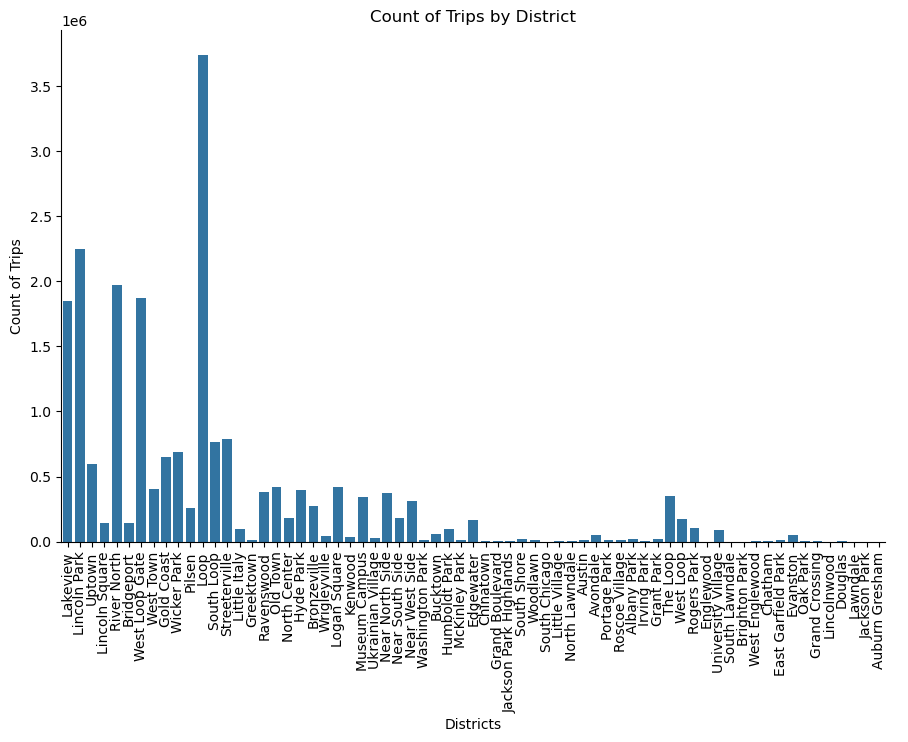

In [43]:
# Plot trips according to districts:
sns.catplot(x='district', kind='count', data=df, height=6, aspect=1.5)
plt.title('Count of Trips by District')
plt.xlabel('Districts')
plt.ylabel('Count of Trips')
plt.xticks(rotation=90)
plt.show()